In [1]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score
from constants import numeric_features, categorical_features
from part2.shared import load_processed_data
from part2.shared import load_train_with_validation_data
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from Logistic import CustomLogisticRegression
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import recall_score



In [2]:
NUMBER_OF_EPOCHS = 250

In [3]:

df = load_processed_data()
df = df[df["Target"].isin(["Graduate", "Dropout"])]
df["y"] = (df["Target"] == "Graduate").astype(int)
df = df.drop(columns=["Target", "Target encoded"], errors='ignore')

In [4]:
X = df.drop(columns=["y"])
y = df["y"].values

In [5]:
num_features = [c for c in numeric_features if c in X.columns]
cat_features = [c for c in categorical_features if c in X.columns]

In [6]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [7]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [8]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [9]:
X_train_raw, X_val_raw, X_test_raw, y_train, y_val, y_test = load_train_with_validation_data(X, y)
X_train = full_pipeline.fit_transform(X_train_raw)
X_test = full_pipeline.transform(X_test_raw)
X_val = full_pipeline.transform(X_val_raw)

In [10]:
model_base = CustomLogisticRegression(
    lr=0.05,
    epochs=NUMBER_OF_EPOCHS,
    batch_size=256,
)
model_base.fit(
    X_train, y_train,
    X_val, y_val,
    X_test, y_test
)

y_pred = model_base.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9288    0.8732    0.9002       284
           1     0.9217    0.9571    0.9391       443

    accuracy                         0.9243       727
   macro avg     0.9253    0.9152    0.9196       727
weighted avg     0.9245    0.9243    0.9239       727



In [11]:
unique, counts = np.unique(y_train, return_counts=True)
print("Liczebność klas:", dict(zip(unique, counts)))

Liczebność klas: {np.int64(0): np.int64(990), np.int64(1): np.int64(1550)}


In [12]:
smote = SMOTE(random_state=1)
X_train_os, y_train_os = smote.fit_resample(X_train, y_train)
unique_os, counts_os = np.unique(y_train_os, return_counts=True)
print("Liczebność klas (po SMOTE):", dict(zip(unique_os, counts_os)))


Liczebność klas (po SMOTE): {np.int64(0): np.int64(1550), np.int64(1): np.int64(1550)}


In [13]:
model_os = CustomLogisticRegression(
    lr=0.05,
    epochs=NUMBER_OF_EPOCHS,
    batch_size=64,
    verbose=True,
)

model_os.fit(X_train_os, y_train_os, X_val, y_val, X_test, y_test)
y_pred_os = model_os.predict(X_test)
print(classification_report(y_test, y_pred_os, digits=4))


Epoch   1/250  train_loss=0.4180  test_loss=0.3922
Epoch  20/250  train_loss=0.2598  test_loss=0.2456
Epoch  40/250  train_loss=0.2420  test_loss=0.2408
Epoch  60/250  train_loss=0.2342  test_loss=0.2357
Epoch  80/250  train_loss=0.2303  test_loss=0.2295
Epoch 100/250  train_loss=0.2273  test_loss=0.2328
Epoch 120/250  train_loss=0.2256  test_loss=0.2311
Epoch 140/250  train_loss=0.2242  test_loss=0.2341
Epoch 160/250  train_loss=0.2232  test_loss=0.2349
Epoch 180/250  train_loss=0.2226  test_loss=0.2371
Epoch 200/250  train_loss=0.2219  test_loss=0.2364
Epoch 220/250  train_loss=0.2214  test_loss=0.2355
Epoch 240/250  train_loss=0.2210  test_loss=0.2377
              precision    recall  f1-score   support

           0     0.8873    0.8873    0.8873       284
           1     0.9278    0.9278    0.9278       443

    accuracy                         0.9120       727
   macro avg     0.9075    0.9075    0.9075       727
weighted avg     0.9120    0.9120    0.9120       727



In [14]:
rus = RandomUnderSampler(random_state=1)
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)
unique_us, counts_us = np.unique(y_train_us, return_counts=True)
print("Liczebność klas (po undersamplingu):", dict(zip(unique_us, counts_us)))


Liczebność klas (po undersamplingu): {np.int64(0): np.int64(990), np.int64(1): np.int64(990)}


In [15]:
model_us = CustomLogisticRegression(
    lr=0.05,
    epochs=NUMBER_OF_EPOCHS,
    batch_size=64,
    verbose=True,
)

model_us.fit(X_train_us, y_train_us, X_val, y_val, X_test, y_test)
y_pred_us = model_us.predict(X_test)
print(classification_report(y_test, y_pred_us, digits=4))

Epoch   1/250  train_loss=0.4557  test_loss=0.4388
Epoch  20/250  train_loss=0.2787  test_loss=0.2613
Epoch  40/250  train_loss=0.2588  test_loss=0.2472
Epoch  60/250  train_loss=0.2500  test_loss=0.2402
Epoch  80/250  train_loss=0.2450  test_loss=0.2366
Epoch 100/250  train_loss=0.2418  test_loss=0.2355
Epoch 120/250  train_loss=0.2395  test_loss=0.2339
Epoch 140/250  train_loss=0.2378  test_loss=0.2354
Epoch 160/250  train_loss=0.2365  test_loss=0.2354
Epoch 180/250  train_loss=0.2355  test_loss=0.2344
Epoch 200/250  train_loss=0.2347  test_loss=0.2343
Epoch 220/250  train_loss=0.2340  test_loss=0.2348
Epoch 240/250  train_loss=0.2334  test_loss=0.2364
              precision    recall  f1-score   support

           0     0.8828    0.9014    0.8920       284
           1     0.9359    0.9233    0.9295       443

    accuracy                         0.9147       727
   macro avg     0.9093    0.9123    0.9108       727
weighted avg     0.9152    0.9147    0.9149       727



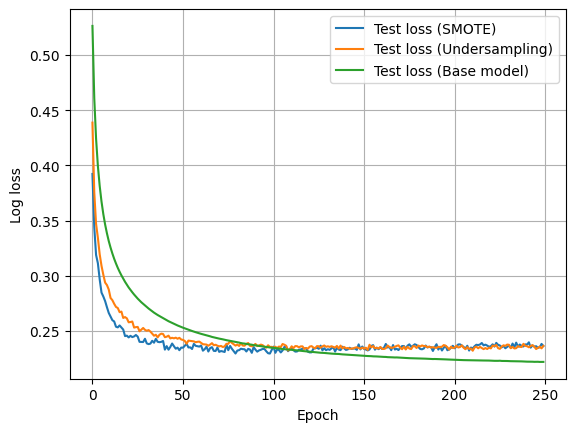

In [16]:
from matplotlib import pyplot as plt

plt.plot(model_os.history["test"], label="Test loss (SMOTE)")
plt.plot(model_us.history["test"], label="Test loss (Undersampling)")
plt.plot(model_base.history["test"], label="Test loss (Base model)")
plt.title("")
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
results_summary = {
    "Model": ["Unchanged Data", "SMOTE", "Undersampling"],
    "Accuracy": [
        accuracy_score(y_test, model_base.predict(X_test)),
        accuracy_score(y_test, model_os.predict(X_test)),
        accuracy_score(y_test, model_us.predict(X_test))
    ],
    "Recall (klasa 0)": [
        recall_score(y_test, model_base.predict(X_test), pos_label=0),
        recall_score(y_test, model_os.predict(X_test), pos_label=0),
        recall_score(y_test, model_us.predict(X_test), pos_label=0)
    ],
    "F1 (klasa 0)": [
        f1_score(y_test, model_base.predict(X_test), pos_label=0),
        f1_score(y_test, model_os.predict(X_test), pos_label=0),
        f1_score(y_test, model_us.predict(X_test), pos_label=0)
    ]
}

summary_df = pd.DataFrame(results_summary)
print(summary_df)


            Model  Accuracy  Recall (klasa 0)  F1 (klasa 0)
0  Unchanged Data  0.924347          0.873239      0.900181
1           SMOTE  0.911967          0.887324      0.887324
2   Undersampling  0.914718          0.901408      0.891986
